In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math as mt # math functions
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting

# `SVM`

`Support Vector Machines (SVMs).` <br>
`SVM` is a popular supervised learning algorithm used for `classification` and `regression` analysis.<br>
 The main idea behind `SVMs` is to find the *hyperplane* in a *high-dimensional*<br>
space that separates the classes in the best possible way.<br>
`SVMs` work by mapping the input data into a **higher-dimensional** feature space,<br>
where it becomes easier to find a **hyperplane** that separates the classes.<br>
The **hyperplane** that `maximizes the margin` between the classes is chosen as the decision boundary.<br>
`SVMs` are widely used in various domains, including image classification, text classification, and bioinformatics.

![](https://vatsalparsaniya.github.io/ML_Knowledge/_images/gif.gif)

### Kernal Trick

![](https://www.researchgate.net/profile/Hyunsoo-Lee-11/publication/341330102/figure/tbl3/AS:915511642697728@1595286393580/Four-Kernel-Functions-for-Kernel-based-SVM.png)

#### `1- Linear Kernal`

The `linear kernel` is used in `SVMs` when the data is linearly separable,<br> or when the number of *features* is very large and the computational<br> cost of using a **nonlinear kernel** is prohibitive.<br> In such cases, the **linear kernel** can provide good classification<br> performance while being computationally efficient.<br>

`Linearly separable data` is data that can be separated by a linear<br> decision boundary in the input space. 

In [3]:
'''Linear Kernel SVM'''
'''Native Python Implementation'''
'''Formula for Linear Kernel SVM: w^T * x + b'''
'''w: weights, x: data, b: bias'''
def linear_kernal_SVM(X, y, C, epochs, learning_rate):
    '''
    X: training data
    y: labels
    C: regularization parameter (hyperparameter)
    epochs: number of iterations
    learning_rate: learning rate for gradient descent
    '''
    
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    for epoch in range(1, epochs):
        for i, x_i in enumerate(X):
            ''' Condition > 1 mean that the data is classified correctly 
            and the margin is greater than 1. '''
            condition = y[i] * (np.dot(x_i, w) - b) >= 1
            if condition:
                ''' Weights are updated as follows: w = w - learning_rate * gradient '''
                ''' Gradient = 2 * C * w '''
                w -= learning_rate * (2 * C * w)
            else:
                ''''If the condition is not satisfied, 
                it means that the i-th training example is misclassified,
                because its margin is less than 1. In this case,
                the algorithm updates the weight vector w using
                the gradient of both the loss function and the regularization 
                term 2 * C * w - np.dot(x_i, y[i]),
                which encourages a larger margin. 
                The algorithm also updates the bias term 
                b using the learning rate and the label of the misclassified example, 
                which shifts the hyperplane towards the correct side.'''
                w -= learning_rate * (2 * C * w - np.dot(x_i, y[i]))
                b -= learning_rate * y[i]
    return w, b

def predict(X, w, b):
    approx = np.dot(X, w) - b
    return np.sign(approx)




[-1.  1. -1.  1.]


![](https://i.ibb.co/JzbHDJp/Screenshot-30.png)

In [4]:
''' Example '''
''' X: training data, y: labels '''
X_train = np.array([[1, 2], [2, 1], [3, 1], [6, 5], [7, 7], [8, 6]])
y_train = np.array([-1, -1, -1, 1, 1, 1])
w, b = linear_kernal_SVM(X_train, y_train, 0.01, 1000, 0.001)
''' X_test: test data, y_test: test labels '''
X_test = np.array([[1, 1], [5, 5], [3, 2], [6, 6]])
y_test = np.array([-1, 1, -1, 1])

predictions = predict(X_test, w, b)
print(predictions)

[-1.  1. -1.  1.]


##### `Pros & Cons` **Linear Kernal**

`Pros`

1- The `linear kernel` is computationally efficient and can handle large datasets with high-dimensional feature spaces.<br>
2- The `linear kernel` is less sensitive to the choice of hyperparameters than other kernel functions, such as the polynomial kernel or the RBF kernel.<br>
3- The `linear kernel` can be used in conjunction with other kernel functions,<br> such as the polynomial kernel or the RBF kernel, to improve the performance of the SVM.<br>

---

`Cons`<br>


1-The `linear kernel` can only capture linear relationships between the input features,<br> which may limit its ability to model complex non-linear relationships.<br>
2-The `linear kernel` may not perform well when the input data is not linearly separable,<br> as it cannot create non-linear decision boundaries.<br>
3-The `linear kernel` may be sensitive to the presence of outliers in the input data,<br> which can affect the position of the hyperplane and result in a poor fit of the SVM.

---

#### `2- Polynomial Kernal`

`Polynomial kernel` is a kernel function maps the input data to a higher-dimensional<br>
feature space using a **polynomial function** of degree `d`.<br>
`The polynomial kernel` can capture *non-linear* relationships between the input features,<br>
 and is often used when the input data is not linearly separable in the original feature space.

In [13]:
'''Ploy Kernel SVM'''
'''Native Python Implementation'''
'''Formula for Ploy Kernel SVM: (gamma * np.dot(x_i, x_j) + r)^d'''
''' gamma in the formula for the polynomial kernel
is a hyperparameter that controls the shape of the decision boundary 
in the higher-dimensional feature space.
It determines the influence of each training example on the position of the decision boundary.
A small value of gamma results in a smoother decision boundary,
while a large value of gamma results in a more complex and flexible decision boundary.'''

def polynomial_kernel_SVM(X, y, X_val, y_val, C, epochs, learning_rate, gamma, r, d):
    '''
    X: training data
    y: labels
    X_val: validation data
    y_val: validation labels  
    C: regularization parameter (hyperparameter)
    epochs: number of iterations
    learning_rate: learning rate for gradient descent
    gamma: hyperparameter
    r: hyperparameter
    d: hyperparameter
    '''
    
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    best_val_acc = 0
    
    for epoch in range(1, epochs):
        learning_rate = learning_rate * 0.95  # decay learning rate
        
        for i, x_i in enumerate(X):
            ''' Condition > 1 mean that the data is classified correctly 
            and the margin is greater than 1. '''
            condition = y[i] * (gamma * (np.dot(x_i, x_i)) ** r + 1) ** d >= 1  
            if condition:
                ''' Weights are updated as follows: w = w - learning_rate * gradient '''
                ''' Gradient = 2 * C * w '''
                w -= learning_rate * (2 * C * w)
            else:
                ''''If the condition is not satisfied, 
                it means that the i-th training example is misclassified,
                because its margin is less than 1. In this case,
                the algorithm updates the weight vector w using
                the gradient of both the loss function and the regularization 
                term 2 * C * w - np.dot(x_i, y[i]),
                which encourages a larger margin. 
                The algorithm also updates the bias term 
                b using the learning rate and the label of the misclassified example, 
                which shifts the hyperplane towards the correct side.'''
                w -= learning_rate * (2 * C * w - np.dot(x_i, y[i]))
                b -= learning_rate * y[i]  
                
        # Calculate validation accuracy    
        val_preds = predict(X_val, w, b)
        val_acc = np.mean(val_preds == y_val)
        
        # Stop if there is no improvement in validation accuracy
        if val_acc > best_val_acc:
            best_val_acc = val_acc
        else:
            break 
            
    return w, b 



`Pros`<br>


1. `Nonlinear decision boundaries`: One of the main advantages of using a polynomial kernel in SVM is that it allows<br>
for nonlinear decision boundaries. This is particularly useful when dealing with complex and nonlinear datasets.<br>
2. `Robustness to outliers`: `Polynomial SVMs` are generally more robust to outliers than linear SVMs.<br> 
This is because the `polynomial kernel function` can capture complex relationships between points,<br>
 allowing the SVM to ignore outliers that do not fit the general pattern of the data.<br>
3. `Computationally efficient`: Compared to other types of SVMs, <br>`polynomial SVMs` are relatively computationally efficient.<br>
 This is because the `polynomial kernel` function is relatively simple to compute,<br>
  and the optimization problem can be solved using existing optimization algorithms.<br>

---

`Cons`<br>

1. `Overfitting`: `Polynomial SVMs` are susceptible to overfitting when the degree of the polynomial kernel is too high.<br>
This is because a high-degree `polynomial kernel` can fit the training data too closely,<br>
 resulting in poor generalization performance on new data.<br>
2. `Hyperparameter tuning`: The performance of a `polynomial SVM` depends heavily on the choice of hyperparameters,<br>
 such as the degree of the polynomial kernel and the regularization parameter C.<br>
  Finding the optimal set of hyperparameters can be a time-consuming and difficult task.<br>
3. `High computational cost`: Although polynomial SVMs are relatively computationally efficient <br>
compared to other types of SVMs, they can still be computationally expensive for large datasets,<br>
 especially if the degree of the `polynomial kernel` is high.<br>
  This is because the computation of the kernel matrix can be expensive,<br>
   and the optimization problem may require a large number of iterations to converge. <br>

---


# `SKLearn`

In [19]:
#SVM
from sklearn import svm
from sklearn.metrics import accuracy_score

#Linear SVM
clf_lin = svm.SVC(kernel='linear')

#Polynomial SVM
clf_pol = svm.SVC(kernel='poly', degree=3, gamma='auto')



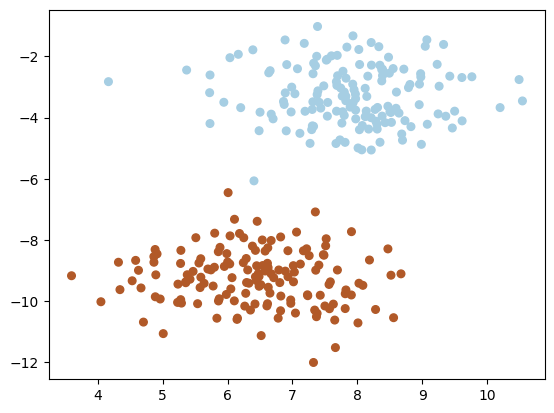

In [6]:
''' Example '''
'''Simple Dataset'''
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=2, random_state=6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)


In [8]:
'''Train Test Split'''
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)

In [9]:
'''SVM'''
'''Linear SVM'''
from sklearn import svm

clf_lin = svm.SVC(kernel='linear')
clf_lin.fit(X_train, y_train)

'''Polynomial SVM'''
from sklearn import svm
clf_pol = svm.SVC(kernel='poly', degree=3, gamma='auto')
clf_pol.fit(X_train, y_train)

'''Predictions'''
y_pred_lin = clf_lin.predict(X_test)
y_pred_pol = clf_pol.predict(X_test)

'''Accuracy'''
from sklearn.metrics import accuracy_score

print('Linear SVM Accuracy: ', accuracy_score(y_test, y_pred_lin))
print('Polynomial SVM Accuracy: ', accuracy_score(y_test, y_pred_pol))


Linear SVM Accuracy:  1.0
Polynomial SVM Accuracy:  1.0


#### `PLotting`

![](https://editor.analyticsvidhya.com/uploads/567891.png)

In [ ]:
'''Margin and Support Vectors'''
'''Margin'''
'''The distance between the decision boundary and the nearest data point (support vector)'''
'''Support Vectors'''
'''The data points that are closest to the decision boundary'''

'''Linear SVM'''
clf_lin.support_vectors_

'''Polynomial SVM'''
clf_pol.support_vectors_


'''Margin'''
'''Linear SVM'''
clf_lin.decision_function(clf_lin.support_vectors_)

'''Polynomial SVM'''
clf_pol.decision_function(clf_pol.support_vectors_) # decision function  is used to calculate the margin

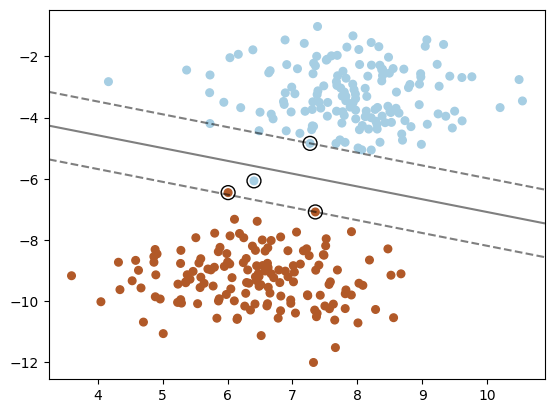

In [10]:
'''Plotting'''
def plot_svm(clf, X, y):
    '''Plotting the decision boundary'''
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    
    ax = plt.gca() # get current axes instance
    xlim = ax.get_xlim() # get x limits
    ylim = ax.get_ylim() # get y limits
    
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30) # create evenly spaced numbers over a specified interval
    yy = np.linspace(ylim[0], ylim[1], 30) # create evenly spaced numbers over a specified interval
    
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    plt.show()
    
plot_svm(clf_lin, X, y)

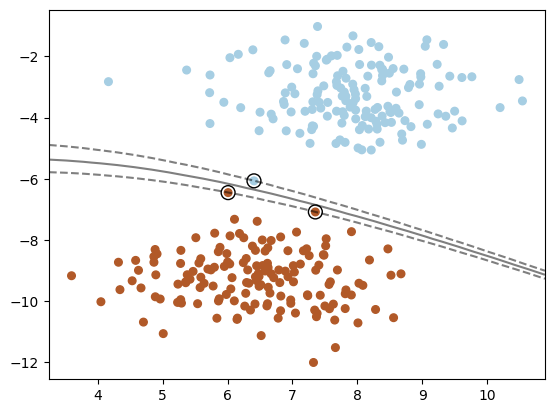

In [11]:
plot_svm(clf_pol, X, y)


## `References`
- [Choose Parameter C - SVM Kernal](https://queirozf.com/entries/choosing-c-hyperparameter-for-svm-classifiers-examples-with-scikit-learn)
- [Polynomial Kernel - From Scratch Using Python.](https://www.pycodemates.com/2022/10/svm-kernels-polynomial-kernel.html)
- [SKLearn Doc - SVM](https://scikit-learn.org/stable/modules/svm.html)